## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

##4.	Using area we  can findout which is more expensive and add review 
##5.	Top host and top area ,which type of room they provide 
##6.	Top area based on rating and also number of listing ,we can show this using map



In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#using pandas library and 'read_csv' function to read dataset
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/EDA Project/Airbnb NYC 2019.csv")

#getting top 5 readings
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#checking amount of rows in given dataset
len(df)

48895

In [6]:
#checking the shape of dataset
df.shape

(48895, 16)

In [7]:
#information about the columns, value types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [8]:
#descriptive statistics for each column.

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Min price is 0 which is weird.

minimum_nights max value is 1250.

After loading the dataset,from the head of Airbnb_NYC_2019 dataset we can see a number of things. These 16 columns provides amount of information for data exploration to do on this dataset.

# Understadning, Wrangling and Cleaning Data

In [9]:
#looking to find out first what columns have null values
df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False


In [10]:
#using 'sum' function will show us how many nulls are found in each column in dataset
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


A total of four columns have missing values, but we don't have to adjust all of them:

1.'name' Unless you'd like to do a text based analysis of the rental names, this column won't add too much to your analysis.
Decision: DROP

2.'host_name' Here again, this column contains personal information and doesn't add much to our analysis. Even if for some reason we did need to use it, its use would be limited as in most cases only the first name is provided.
Decision: DROP

3.'last_review' Since these are all dates, a missing value most likely means that there has been no review for this rental. I won't be using this for any analysis or visualization.
Decision: Drop

4.'reviews_per_month' We might be able to do some analysis with this. This is the kind of situation where own intuition supplements the analysis. In this column, missing values most likely do not mean that the data points were not recorded but that they don't exist, a contrast I've learned to appreciate when dealing with missing values.
Decision: REPLACE missing values with 0's

In [11]:
#dropping columns that are not useful for analysis.
df.drop(['name','host_name','last_review'],axis = 1,inplace=True)

# we now have 13 columns to work with
df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month':0}, inplace=True)

df.reviews_per_month.isnull().sum()

0

In [13]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
# finding some interesting categorical unique values

#finding unique values of neighbourhood_group
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [15]:
len(df.neighbourhood.unique())

221

In [16]:
#finding the unique values of room_type
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Understanding unique values and categorical data that we have in our dataset.

# **Exploring and Visualizing Data**

In [17]:
# Let's look at some statistics by the three kinds of room types available onn Airbnb
by_room = df.groupby('room_type').agg(['count'])
by_room.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
,count,count,count,count,count,count,count,count,count,count,count,count
room_type,,,,,,,,,,,,
Entire home/apt,25409,25409,25409,25409,25409,25409,25409,25409,25409,25409,25409,25409
Private room,22326,22326,22326,22326,22326,22326,22326,22326,22326,22326,22326,22326
Shared room,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160,1160


In [18]:
# this index call will come in handy in a barchart that separates values by room type. It will go on the x axis
by_room.index

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')

In [19]:
# this count will go on our y axis
by_room['id']['count']

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

(0.0, 30000.0)

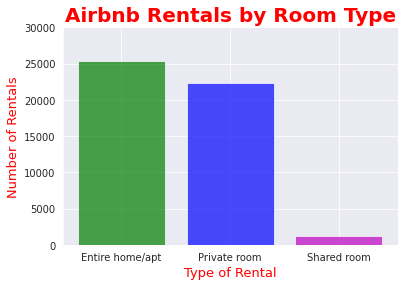

In [20]:
sns.set_style('darkgrid')

plt.rcParams['axes.axisbelow'] = True
plt.grid(b=True,which ='major',axis='y')
my_colors =['g','b','m']

# This is the primary code guiding the structure of the plot. Notice how we specified the values for both axes.
plt.bar(x=by_room.index, height=by_room['id']['count'], color=my_colors, alpha=.7)

# Label the data
plt.xlabel('Type of Rental',color='r',fontsize=13)
plt.ylabel('Number of Rentals',color='r',fontsize=13)
plt.title('Airbnb Rentals by Room Type',color='r',fontsize='20',fontweight='bold')

# I set the upper y limit to 30000 in order to get a little more room at the top of the plot. 
# Otherwise, it would be a little tight 
plt.ylim(0,30000)

We can see that entire home/apt and private rooms have been utilized much.

In [21]:
# Next, let's see how the listings are distributed across the five boroughs
by_neighbourhood_group = df.groupby('neighbourhood_group').agg(['count'])
by_neighbourhood_group.head()

,id,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
,count,count,count,count,count,count,count,count,count,count,count,count
neighbourhood_group,,,,,,,,,,,,
Bronx,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091,1091
Brooklyn,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104,20104
Manhattan,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661,21661
Queens,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666,5666
Staten Island,373,373,373,373,373,373,373,373,373,373,373,373


In [22]:
# Here I sorted the data from highest to lowest before plotting it below
by_neighbourhood_group_sorted = by_neighbourhood_group['id']['count'].sort_values(ascending=False)

by_neighbourhood_group_sorted

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

(0.0, 25000.0)

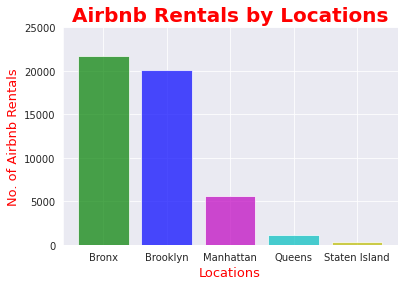

In [23]:
sns.set_style('darkgrid')

plt.grid(b=True,which ='major',axis='y')
my_colors =['g','b','m','c','y']

plt.bar(x=by_neighbourhood_group.index,height=by_neighbourhood_group_sorted,color=my_colors,alpha=.7)

plt.xlabel('Locations',color='r',fontsize=13)
plt.ylabel('No. of Airbnb Rentals',color='r',fontsize=13)
plt.title('Airbnb Rentals by Locations',color='r',fontsize='20',fontweight='bold')

# I reset the upper y limit here again
plt.ylim(0,25000)

**Price distributions**

In [24]:
room_pivot = pd.pivot_table(df,'price',['neighbourhood_group','room_type'],aggfunc=np.mean)
room_pivot

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.788344
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.327545
                    Private room      76.500099
                    Shared room       50.527845
Manhattan           Entire home/apt  249.239109
                    Private room     116.776622
                    Shared room       88.977083
Queens              Entire home/apt  147.050573
                    Private room      71.762456
                    Shared room       69.020202
Staten Island       Entire home/apt  173.846591
                    Private room      62.292553
                    Shared room       57.444444

In [25]:
avg_by_neighbourhood_group = df.groupby(['neighbourhood_group']).mean()
avg_price_by_neighbourhood_group_sorted= avg_by_neighbourhood_group['price'].sort_values(ascending=False)
avg_price_by_neighbourhood_group_sorted

neighbourhood_group
Manhattan        196.875814
Brooklyn         124.383207
Staten Island    114.812332
Queens            99.517649
Bronx             87.496792
Name: price, dtype: float64

(0.0, 250.0)

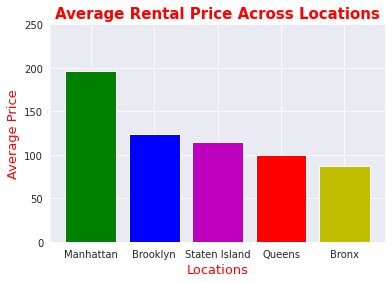

In [26]:
# Here I decided to state the colors
sns.set_style('darkgrid')

le_colors =['g','b','m','r','y']
plt.bar(x=avg_price_by_neighbourhood_group_sorted.index, height=avg_price_by_neighbourhood_group_sorted, color=le_colors)

plt.title('Average Rental Price Across Locations',color='r',fontsize=15,fontweight='bold')
plt.xlabel('Locations',color='r',fontsize=13)
plt.ylabel('Average Price',color='r',fontsize=13)
plt.ylim(0,250)

*1. With Outliers*

Text(0.5, 0, '-- Locations --')

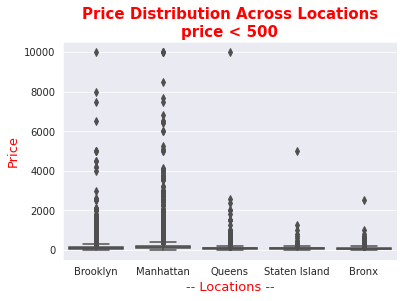

In [27]:
sns.set_style('darkgrid')

box_price = sns.boxplot(x='neighbourhood_group',y='price',data=df,palette='rainbow',showfliers=True)
box_price.set_title('Price Distribution Across Locations\n'+'price < 500',fontsize=15,color='r', fontweight='bold')
box_price.set_ylabel('Price',color='r', fontsize=13)
box_price.set_xlabel('-- Locations --',color='r',fontsize=13)

*2. Without Outliers*

Text(0.5, 0, '-- Locations --')

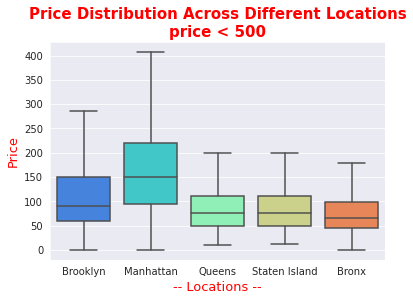

In [28]:
sns.set_style('darkgrid')

box_price = sns.boxplot(x='neighbourhood_group',y='price',data=df,palette='rainbow',showfliers=False)
box_price.set_title('Price Distribution Across Different Locations\n'+'price < 500',fontsize=15,color='r', fontweight='bold')
box_price.set_ylabel('Price',color='r', fontsize=13)
box_price.set_xlabel('-- Locations --',color='r',fontsize=13)

In [29]:
Bronx_bar = list(room_pivot[0:3]['price'])
Bronx_bar

[127.5065963060686, 66.78834355828221, 59.8]

In [30]:
Brooklyn_bar = list(room_pivot[3:6]['price'])
Brooklyn_bar

[178.32754472225128, 76.500098697197, 50.52784503631961]

In [31]:
Manhattan_bar = list(room_pivot[6:9]['price'])
Manhattan_bar

[249.23910902341086, 116.7766224004009, 88.97708333333334]

In [32]:
Queens_bar = list(room_pivot[9:12]['price'])
Queens_bar

[147.05057251908397, 71.76245551601423, 69.02020202020202]

In [33]:
Staten_Island_bar = list(room_pivot[12:15]['price'])
Staten_Island_bar

[173.8465909090909, 62.29255319148936, 57.44444444444444]

*Reverse Engineer through the help of matplotlib documentation*

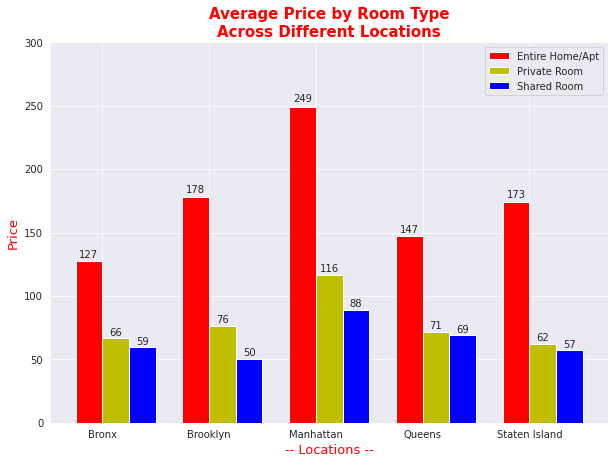

In [34]:
sns.set_style('darkgrid')

N = 5
entire = list(room_pivot['price'][[0,3,6,9,12]])

ind = np.arange(N)  # the x locations for the groups
width = .25       # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))

rects1 = ax.bar(ind, entire, width, color='r')


private = list(room_pivot['price'][[1,4,7,10,13]])

rects2 = ax.bar(ind + width, private, width, color='y')


shared = list(room_pivot['price'][[2,5,8,11,14]])
rects3 = ax.bar(ind + width+width, shared, width, color='b')


# add some text for labels, title and axes ticks
ax.set_title('Average Price by Room Type\n'+'Across Different Locations',color='r',fontsize=15, fontweight='bold')
ax.set_ylabel('Price',color='r',fontsize=13)
ax.set_xlabel('-- Locations --',color='r',fontsize=13)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Entire Home/Apt', 'Private Room','Shared Room'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#Let's reset the y-axis limits to give some buffer room for that 
#tall $249-priced column
plt.ylim(0,300)


plt.show()

In [35]:
# The column lists the amount of days that the listing was available for rental throughout the 2019 calendar year
df['availability_365'].head(10)

0    365
1    355
2    365
3    194
4      0
5    129
6      0
7    220
8      0
9    188
Name: availability_365, dtype: int64

In [36]:
# One useful way of visualizing this would be to separate the values into ranges of days,
# say into 4 groups as follows:
a_availability = df[df['availability_365']<=90].count()[0]
b_availability = df[(df['availability_365']>90) & (df['availability_365']<=180)].count()[0]
c_availability = df[(df['availability_365']>180) & (df['availability_365']<=270)].count()[0]
d_availability = df[(df['availability_365']>270)].count()[0]

In [37]:
print(a_availability)
print(b_availability)
print(c_availability)
print(d_availability)

29246
5285
4513
9851


Text(0.5, 1.0, 'Availability of Airbnb Rentals\nAs a % of the Calendar Year 2019')

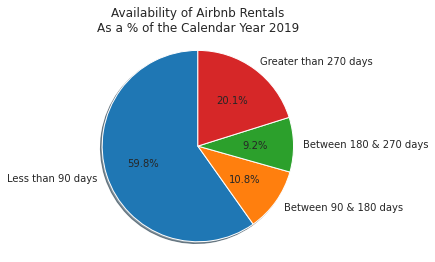

In [38]:
# With our ranges created using indexing and '&' operators, i have plotted data using pie chart

labels = 'Less than 90 days','Between 90 & 180 days','Between 180 & 270 days','Greater than 270 days'
sizes = a_availability,b_availability,c_availability,d_availability
#explode = (.1,.1,.1,.1)

availability_pie = plt.pie(sizes,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',radius=1.1)
plt.title('Availability of Airbnb Rentals\n'+'As a % of the Calendar Year 2019')

Text(0.5, 1.0, 'Availability of Airbnb Rentals\nAs a % of the Calendar Year 2019')

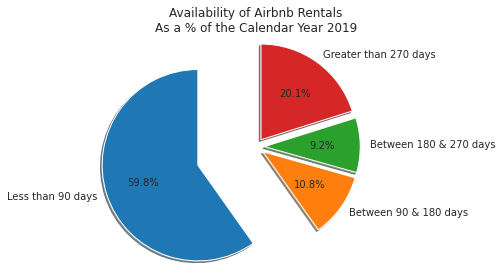

In [39]:
# With our ranges created using indexing and '&' operators, i have plotted data using pie chart

labels = 'Less than 90 days','Between 90 & 180 days','Between 180 & 270 days','Greater than 270 days'
sizes = a_availability,b_availability,c_availability,d_availability
explode = (.7,.1,.1,.1)  # to get distance b/w each slice

availability_pie = plt.pie(sizes,labels=labels,explode=explode,shadow=True,startangle=90,autopct='%1.1f%%',radius=1.1)
plt.title('Availability of Airbnb Rentals\n'+'As a % of the Calendar Year 2019')

we see that nearly 60% of Airbnb listings are available for less then a quarter of the year.
 
Because of the way I created the four ranges, the 4th range, "Greater than 270 days" has five more days then the other ranges since there are 365 days in the year.

***the top ten or twenty hosts with the most listings***

In [40]:
df['host_id'].value_counts().head(20)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
25237492      34
119669058     34
Name: host_id, dtype: int64

In [41]:
# As before, I find it mentally easier to first clarify what our x and y values will be: 
a = df['host_id'].value_counts()
top_host_values = a[0:20]
top_host_index = a[0:20].index
top_host_values

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
1475015       52
120762452     50
2856748       49
205031545     49
190921808     47
26377263      43
2119276       39
19303369      37
25237492      34
119669058     34
Name: host_id, dtype: int64

In [42]:
top_host_index

Int64Index([219517861, 107434423,  30283594, 137358866,  12243051,  16098958,
             61391963,  22541573, 200380610,   7503643,   1475015, 120762452,
              2856748, 205031545, 190921808,  26377263,   2119276,  19303369,
             25237492, 119669058],
           dtype='int64')

(0.0, 350.0)

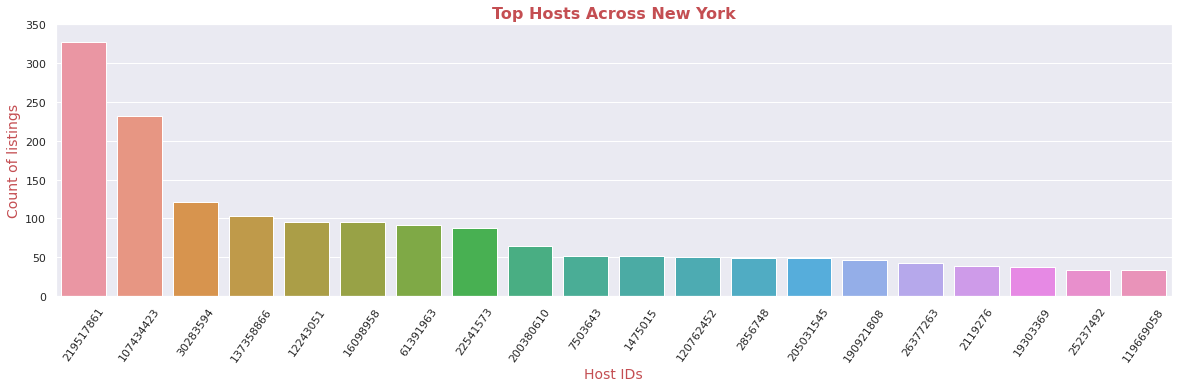

In [54]:
host_chart = sns.barplot(y=top_host_values,x=top_host_index,order=top_host_index)
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,2)})


# the following line sets the contentn of the xtick labels and their rotation. 
host_chart.set_xticklabels(host_chart.get_xticklabels(), rotation=55)


host_chart.set_title('Top Hosts Across New York',color='r',fontsize=16,fontweight='bold')
host_chart.set_ylabel('Count of listings',color='r',fontsize=14)
host_chart.set_xlabel('Host IDs',color='r',fontsize=14)
plt.ylim(0,350)

***top ten most popular neighborhoods for rent***

In [44]:
# Let's plot the neighborhoods in nyc with the most listings
a = df['neighbourhood'].value_counts()
a

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Willowbrook              1
Fort Wadsworth           1
Rossville                1
Woodrow                  1
New Dorp                 1
Name: neighbourhood, Length: 221, dtype: int64

In [45]:
top_neighbourhood_values = a.head(10)
print(top_neighbourhood_values)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64


In [46]:
top_neighbourhood_values = a[0:10]
top_neighbourhood_values

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [47]:
top_neighbourhood_index = a.head(10).index
top_neighbourhood_index

Index(['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick',
       'Upper West Side', 'Hell's Kitchen', 'East Village', 'Upper East Side',
       'Crown Heights', 'Midtown'],
      dtype='object')

Text(0.5, 0, 'Neighbourhood')

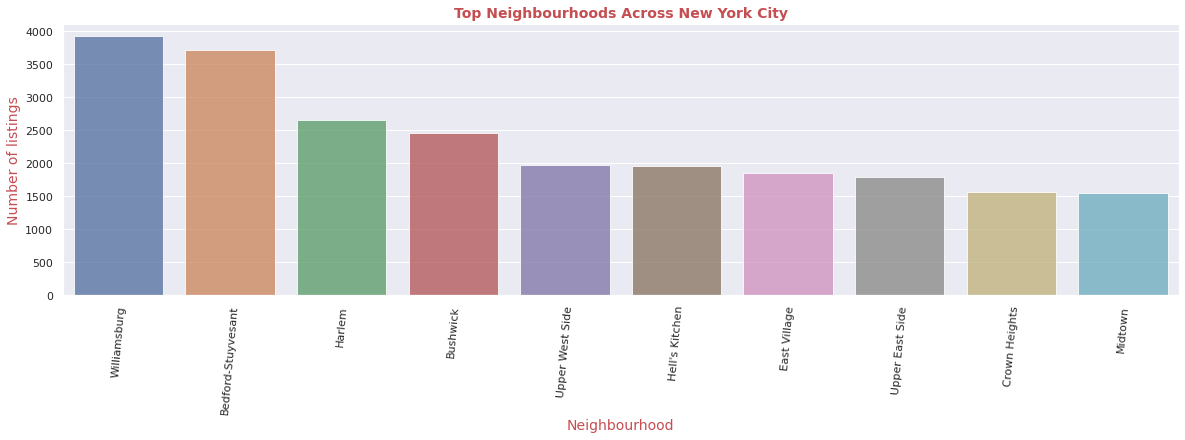

In [55]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20,5)})


neighbourhood_chart = sns.barplot(y=top_neighbourhood_values,x=top_neighbourhood_index,order=top_neighbourhood_index,alpha=.8)

# Because some of the neighborhood names were long, I found that setting the rotation less then 80 degrees distorted the position of the xtick labels. 
neighbourhood_chart.set_xticklabels(neighbourhood_chart.get_xticklabels(), rotation=85)


neighbourhood_chart.set_title('Top Neighbourhoods Across New York City',color='r',fontsize=14,fontweight='bold')
neighbourhood_chart.set_ylabel('Number of listings',color='r',fontsize=14)
neighbourhood_chart.set_xlabel('Neighbourhood',color='r',fontsize=14)

**using latitude and longitude coordinates**

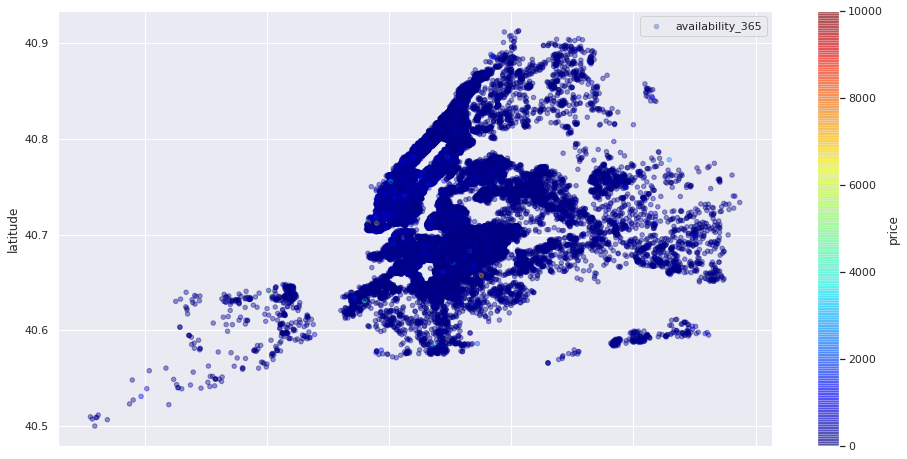

In [57]:
# First, plotting the entire dataset using the location coordinates on the x and y axis
df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(16,8))
plt.show()

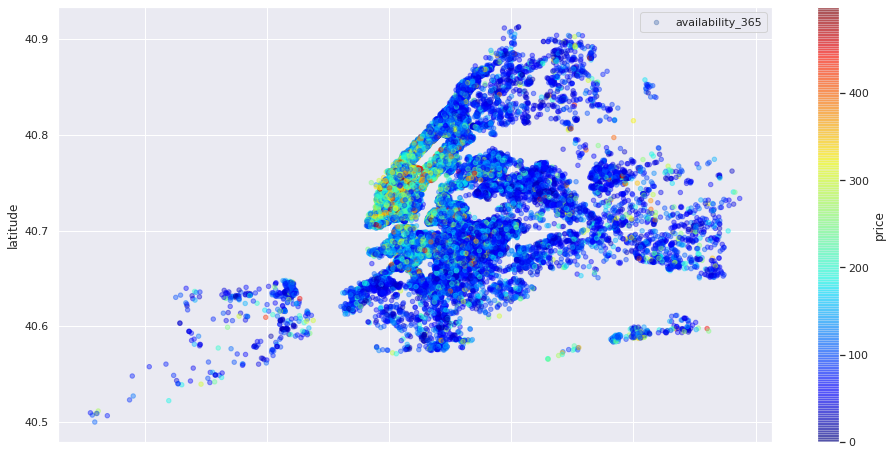

In [56]:
# by using price less than the 500
price_plot = df[df.price < 500]
price_plot.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(16,8))
plt.show()

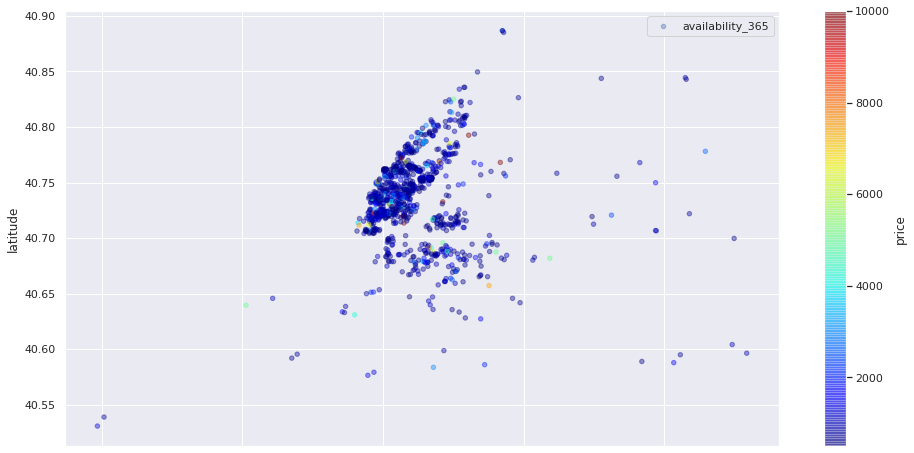

In [51]:
# by using price more than the 500
price_plot_500 = df[df.price > 500]
price_plot_500.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(16,8))
plt.show()

from previous price visualizations, the points are concentrated in Manhattan with the second most points across Brooklyn

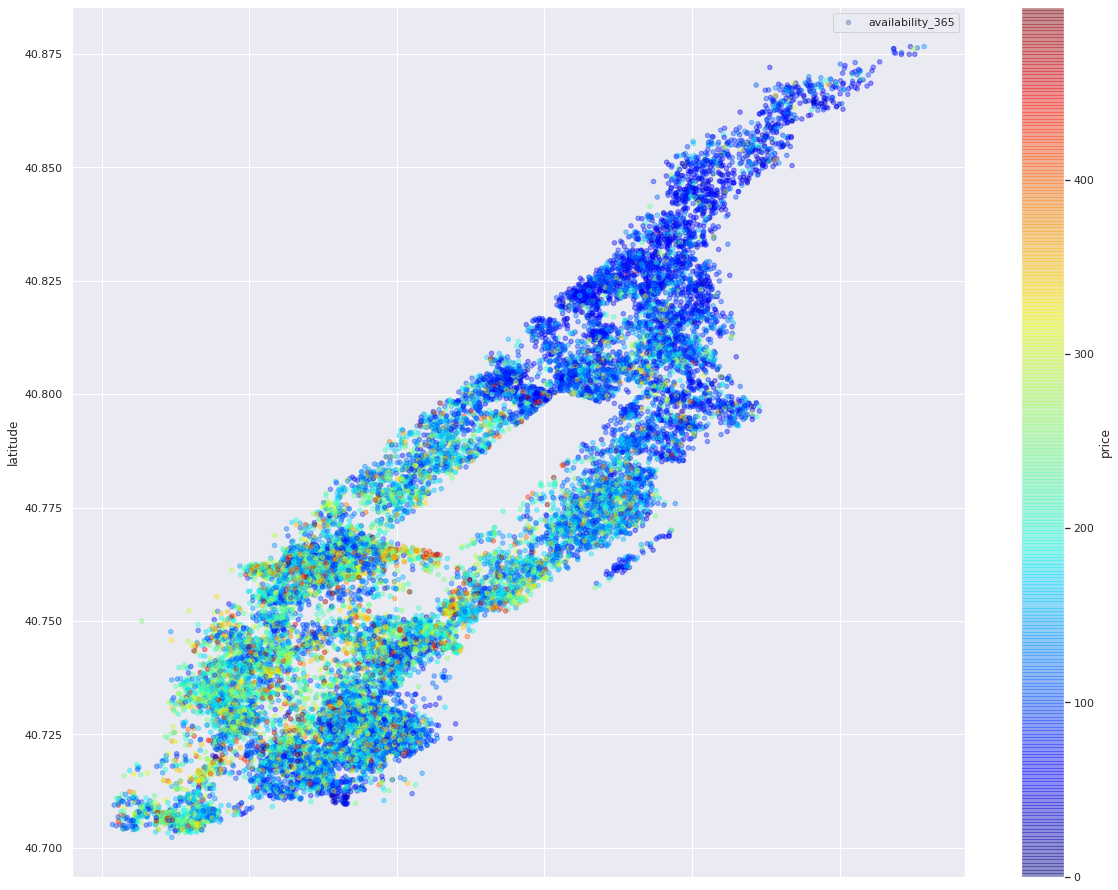

In [52]:
# price less than 500 and using only manhattan through boolean statement
price_plot_manhattan = df[(df.price < 500) & (df.neighbourhood_group=='Manhattan')]
price_plot_manhattan.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(20,16))
plt.show()

*locations of all listings, and instead of showing price variations, just label the points by neighbourhood_group.*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


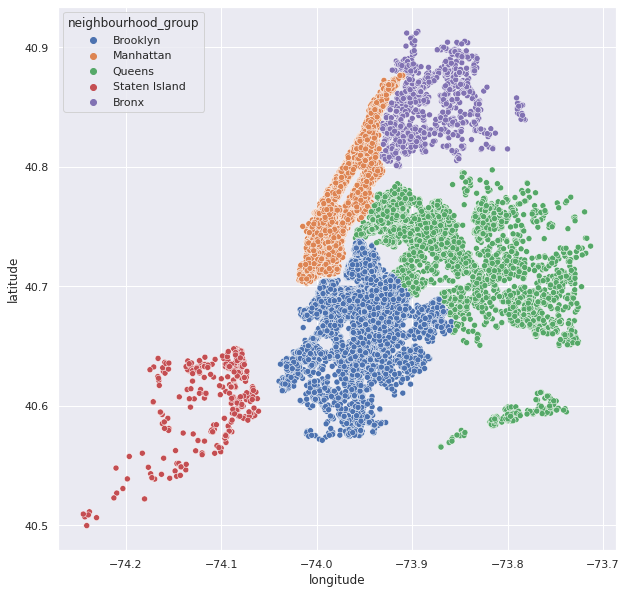

In [53]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)